<a href="https://colab.research.google.com/github/Afranur-Artar/Deep-Learning-NLP-Project/blob/main/IMDB_NLP_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import string
import re
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [5]:
pd.set_option('display.max_colwidth', 70)
df=pd.read_csv("IMDB Dataset.csv", engine ='python')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just ...,positive
1,A wonderful little production. <br /><br />The filming technique i...,positive
2,I thought this was a wonderful way to spend time on a too hot summ...,positive
3,Basically there's a family where a little boy (Jake) thinks there'...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning...",positive


In [6]:
df.shape

(50000, 2)

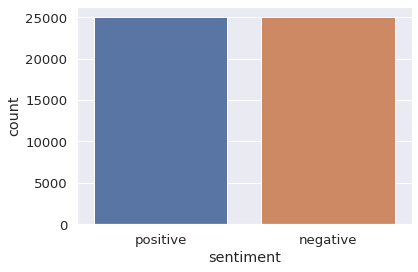

In [7]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.sentiment);

In [8]:
print("Positive sentiment length is {}". format(len(df[df.sentiment=="positive"])/len(df)))
print("Positive sentiment length is {}". format(len(df[df.sentiment=="negative"])/len(df)))

Positive sentiment length is 0.5
Positive sentiment length is 0.5


In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
pd.set_option('display.max_colwidth', 150)
df.review.iloc[150:160]

150    A young girl becomes a war-time marine's pen-pal, and when he visits at war's end expecting someone a bit more "available," comic complications en...
151    This movie is a perfect adaptation of the English Flick Unfaithful. Ashmit plays the role of Richard Gere, Emran that of Olivier and Malikka the p...
152    Robert Altman's downbeat, new-fangled western from Edmund Naughton's book "McCabe" was overlooked at the time of its release but in the past years...
153    What seemed at first just another introverted French flick offering no more than baleful sentiment became for me, on second viewing, a genuinely i...
154    I don't think I've ever gave something a 1/10 rating, but this one easily gets the denomination. I find it hard just to sit through one of his jok...
155    In the standard view, this is a purely awful movie. However, it rates a near perfect score on the unintentional comedy scale. I can think of few a...
156    From the film's first shot - Keira Knightley as Eli

In [13]:
df["sentiment"]=pd.get_dummies(df["sentiment"], drop_first=True)
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...",1
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...,0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi...",1


In [14]:
# Before tokenization, first apply re.sub() function to replace Synonym, antonym, meaning words

# Replace movie's synonyms
synonyms=[]
antonyms=[]

for syn in wordnet.synsets("movie"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
            
print("Synonyms of movie:", synonyms)
print("Antonyms of movie:", antonyms)

Synonyms of movie: ['movie', 'film', 'picture', 'moving_picture', 'moving-picture_show', 'motion_picture', 'motion-picture_show', 'picture_show', 'pic', 'flick']
Antonyms of movie: []


In [30]:
def replace(words):
    words=re.sub(r" film ", "movie", words)
    words=re.sub(r" films ", "movie", words)
    words=re.sub(r" film's ", "movie", words)
    words=re.sub(r" filming ", "movie", words)
    words=re.sub(r" I've ", "I have", words)
    words=re.sub(r" movies ", "movie", words)
    words=re.sub(r"picture", "movie", words)
    words=re.sub(r"pic", "movie", words)
    words=re.sub(r"moving_picture", "movie", words)
    words=re.sub(r"moving-picture_show", "movie", words)
    words=re.sub(r"motion_picture", "movie", words)
    words=re.sub(r"motion_picture_show", "movie", words)
    words=re.sub(r"picture_show", "movie", words)
    words=re.sub(r"watching", "watch", words)
    words=re.sub(r"watched", "watch", words)
    words=re.sub(r"saw", "see", words)
    words=re.sub(r"I'd love", "I would love", words)
    words=re.sub(r"seen", "see", words)
    words=re.sub(r"gone", "go", words)
    words=re.sub(r"went", "go", words)
    words=re.sub(r"wouldnt", "would not", words)
    words=re.sub(r"thismovieon", "this movie on", words)
    words=re.sub(r"stunningmovieto ", "stunning movie to", words)
    words=re.sub(r"Themovietechnique", "The movie technique", words)
    words=re.sub(r"couldnt", "could not", words)
    words=re.sub(r"<br /><br />", " ", words)
    words=re.sub(r"you're", "you",words)
    words=re.sub(r"they're", "you",words)
    words=re.sub(r"They're", "you",words)
    words=re.sub(r"went", "go",words)
    words=re.sub(r"gone", "go",words)
    words=re.sub(r"old-time-BBC", "old time BBC",words)
    words=re.sub(r"youll", "you will",words)
    words=re.sub(r"Somemoviejust", "some movie just",words) 
    words=re.sub(r"firstmoviei", "first movie",words)
    words=re.sub(r"wasn't", "was not",words)
    words=re.sub(r"there's", "there is",words)
    words=re.sub(r"quirkymoviewhere", "quirky movie where",words) 
    words=re.sub(r"all-time", "all time",words)
    words=re.sub(r"im", "i am",words)
    words=re.sub(r"unassuming-", "unassuming",words) 
    words=re.sub(r"light-hearted", "light hearted",words)
    words=re.sub(r"stunningmovieof", "stunning movie of",words) 
    words=re.sub(r"don't", "do not",words)
    words=re.sub(r"doesn't", "does not",words)
    words=re.sub(r"Trekmovieto", "Trek movie to",words) 
    words=re.sub(r"tymovieal", "ty movie al",words)  
    words=re.sub(r"bestmovieof", "best movie of",words) 
    words=re.sub(r"haven't", "have not",words) 
    words=re.sub(r"hasn't", "has not",words)
    words=re.sub(r"ti ame", "time",words)
    words=re.sub(r"well-known", "well known",words)
    words=re.sub(r"full-ti ame", "full time",words)
    words=re.sub(r"didn't", "did not",words)
    words=re.sub(r"it's", "it is",words)
    words=re.sub(r"Thismovietried", "This movie tried",words) 
    words=re.sub(r"thismovienot", "this movie not",words) 
    words=re.sub(r"thismovieat", "this movie at",words) 
    words=re.sub(r"finestmovieever", "finest movie ever",words) 
    words=re.sub(r"entiremovieis", "entire movie is",words) 
    words=re.sub(r"experi ament", "experiment",words)
    words=re.sub(r"b-movie", "movie",words)
    words=re.sub(r"ofmovieof", "of movie of",words) 
    words=re.sub(r"thismoviecould", "this movie could",words) 
    words=re.sub(r"It's", "It is",words)
    words=re.sub(r"cannot", "can not",words)
    words=re.sub(r"clichés", " ",words)
    words=re.sub(r"aboutmoviebefore", "about movie before",words) 
    words=re.sub(r"shortmoviesucks", "short movie sucks",words) 
    words=re.sub(r"Thismovietook", "This movie took",words) 
    words=re.sub(r"Thismovielaboured", "This movie laboured",words) 
    words=re.sub(r"I've", "I have",words) 
    words=re.sub(r"i've", "i have",words)
    words=re.sub(r"si ample", "simple",words)
    words=re.sub(r"well", "good",words)
    words=re.sub(r"you'll", "you will",words)
    words=re.sub(r"Ti ame", "time",words)
    words=re.sub(r"towatch", "to watch",words)
    words=re.sub(r"Oz", " ",words)
    words=re.sub(r"oz", " ",words)
    words=re.sub(r"Mr.", " ",words)
    words=re.sub(r"They're", "They are",words)
    words=re.sub(r"I don't", "I do not",words)
    words=re.sub(r"movieand", "movie and",words)
    words=re.sub(r"mistakei", "mistake",words)
    words=re.sub(r"loo", "look",words)
    
    return str(words)

df["review"]=df["review"].apply(replace)

df["review"].head()

0    one of the other reviewers has mentioned that after watch just  episode you will be hooked they are right as this is exactly what happened with me...
1    a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...
3    basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...
4    petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...
Name: review, dtype: object

## Remove Punctuation

In [31]:
# Remove punctuation:

def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

%time df["review"]=df["review"].apply(lambda x: remove_punct(x.lower()))

df.review.head(10)

CPU times: user 5.5 s, sys: 9.9 ms, total: 5.51 s
Wall time: 5.52 s


0    one of the other reviewers has mentioned that after watch just  episode you will be hooked they are right as this is exactly what happened with me...
1    a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...
3    basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...
4    petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...
5    probably my all time favorite movie a story of selflessness sacrifice and dedication to a noble cause but it is not preachy or boring it just neve...
6    i sure would like to see a resurrection of a up dated seahunt ser

### Remove url, special characters

In [32]:
# Remove url and other characters

def remove_url(txt):
    text=" ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    return text

df["review"]=df["review"].apply(lambda x: remove_url(x))
df.review.head()

0    one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...
1    a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...
3    basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...
4    petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...
Name: review, dtype: object

In [33]:
# Remove numbers

df['review'] = df['review'].str.replace('\d','')

df.review.head()

0    one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...
1    a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...
3    basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...
4    petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...
Name: review, dtype: object

In [34]:
#Removing html strips

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

df['review'] = df['review'].apply(lambda text: remove_html(text))

## Tokenization

In [35]:
import re

def tokenize(text):
    tokens=re.split('\W+', text)
    return tokens

%time df["review_tokenized"]=df["review"].apply(lambda x: tokenize(x))

df.head()

CPU times: user 3.19 s, sys: 260 ms, total: 3.45 s
Wall time: 3.46 s


,review,sentiment,review_tokenized,review_nostop,review_lemmatized
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti..."
3,basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...,0,"[basically, there, is, a, family, where, a, little, boy, jake, thinks, there, is, a, zombie, in, his, closet, his, parents, are, fighting, all, th...","[basically, family, little, boy, jake, thinks, zombie, closet, parents, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, becom...","[basically, family, little, boy, jake, think, zombie, closet, parent, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, become,..."
4,petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...,1,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, movie, to, watch, mattei, offers, us, a, vivid, portrait, about, huma...","[petter, matteis, love, time, money, visually, stunning, movie, watch, mattei, offers, us, vivid, portrait, human, relations, movie, seems, tellin...","[petter, matteis, love, time, money, visually, stunning, movie, watch, mattei, offer, u, vivid, portrait, human, relation, movie, seems, telling, ..."


### Remove Stopwords

In [36]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopword(tokenized_list):
    text= [word for word in tokenized_list if word not in stopword]
    return text

%time df["review_nostop"]=df["review_tokenized"].apply(lambda x: remove_stopword(x))

df.head()

CPU times: user 16.8 s, sys: 9.8 ms, total: 16.8 s
Wall time: 16.8 s


,review,sentiment,review_tokenized,review_nostop,review_lemmatized
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti..."
3,basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...,0,"[basically, there, is, a, family, where, a, little, boy, jake, thinks, there, is, a, zombie, in, his, closet, his, parents, are, fighting, all, th...","[basically, family, little, boy, jake, thinks, zombie, closet, parents, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, becom...","[basically, family, little, boy, jake, think, zombie, closet, parent, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, become,..."
4,petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...,1,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, movie, to, watch, mattei, offers, us, a, vivid, portrait, about, huma...","[petter, matteis, love, time, money, visually, stunning, movie, watch, mattei, offers, us, vivid, portrait, human, relations, movie, seems, tellin...","[petter, matteis, love, time, money, visually, stunning, movie, watch, mattei, offer, u, vivid, portrait, human, relation, movie, seems, telling, ..."


### Stem Text

In [37]:
import nltk

ps = nltk.PorterStemmer()

In [38]:
def stemming(tokenized_text):
    text= [ps.stem(word) for word in tokenized_text]
    return text

%time df["review_stemmed"]=df["review_nostop"].apply(lambda x: stemming(x)) 
df.head()

CPU times: user 1min 43s, sys: 229 ms, total: 1min 43s
Wall time: 1min 43s


,review,sentiment,review_tokenized,review_nostop,review_lemmatized,review_stemmed
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r...","[one, review, mention, watch, episod, hook, right, exactli, happen, first, thing, struck, brutal, unflinch, scene, violenc, set, right, word, go, ..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,...","[wonder, littl, product, movi, techniqu, unassum, old, time, bbc, fashion, give, comfort, sometim, discomfort, sens, realism, entir, piec, actor, ..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, light, heart, comedi, plot, si, amplist, dialogu, witt..."
3,basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...,0,"[basically, there, is, a, family, where, a, little, boy, jake, thinks, there, is, a, zombie, in, his, closet, his, parents, are, fighting, all, th...","[basically, family, little, boy, jake, thinks, zombie, closet, parents, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, becom...","[basically, family, little, boy, jake, think, zombie, closet, parent, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, become,...","[basic, famili, littl, boy, jake, think, zombi, closet, parent, fight, time, movi, slower, soap, opera, suddenli, jake, decid, becom, rambo, kill,..."
4,petter matteis love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a m...,1,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, movie, to, watch, mattei, offers, us, a, vivid, portrait, about, huma...","[petter, matteis, love, time, money, visually, stunning, movie, watch, mattei, offers, us, vivid, portrait, human, relations, movie, seems, tellin...","[petter, matteis, love, time, money, visually, stunning, movie, watch, mattei, offer, u, vivid, portrait, human, relation, movie, seems, telling, ...","[petter, mattei, love, time, money, visual, stun, movi, watch, mattei, offer, us, vivid, portrait, human, relat, movi, seem, tell, us, money, powe..."


### Lemmatizing

In [24]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
def lemmatizing(tokenized_test):
    text=[wn.lemmatize(word) for word in tokenized_test]
    return text

%time df["review_lemmatized"]=df["review_nostop"].apply(lambda x: lemmatizing(x))

df.head(3)

CPU times: user 21.6 s, sys: 56.9 ms, total: 21.7 s
Wall time: 21.7 s


,review,sentiment,review_tokenized,review_nostop,review_lemmatized,review_stemmed
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r...","[one, review, mention, watch, episod, hook, right, exactli, happen, first, thing, struck, brutal, unflinch, scene, violenc, set, right, word, go, ..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,...","[wonder, littl, product, movi, techniqu, unassum, old, time, bbc, fashion, give, comfort, sometim, discomfort, sens, realism, entir, piec, actor, ..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, light, heart, comedi, plot, si, amplist, dialogu, witt..."


#### I prefer to use lemmatizing method because of better

In [40]:
df.drop(["review_stemmed"], axis=1, inplace=True)

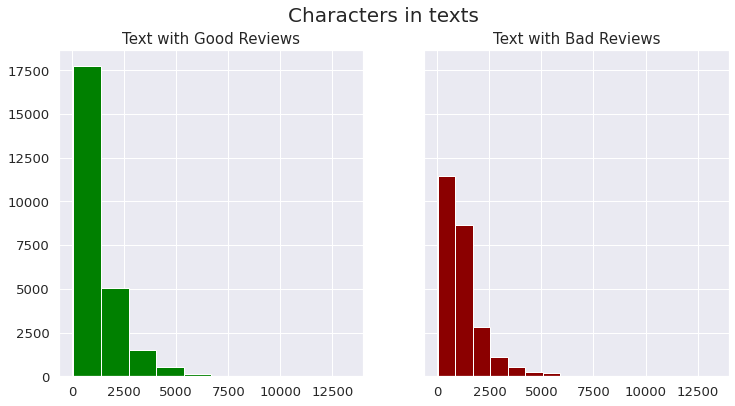

In [41]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)

text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews', fontsize=15)

text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='darkred')
ax2.set_title('Text with Bad Reviews', fontsize=15)

fig.suptitle('Characters in texts', fontsize=20)
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

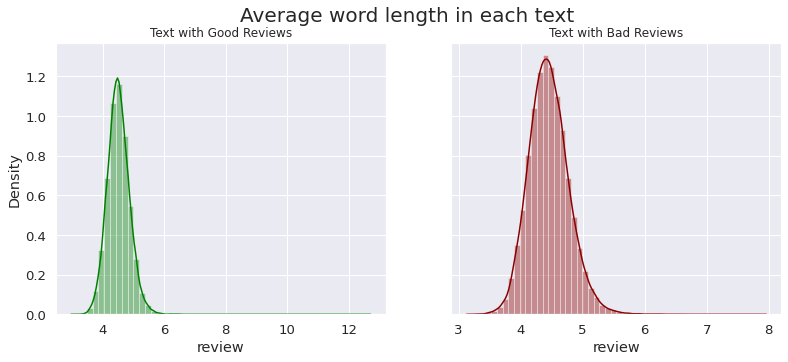

In [42]:
# Average word length in a text

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5), sharey=True)

word=df[df['sentiment']==1]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews',fontsize=12)

word=df[df['sentiment']==0]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='darkred')
ax2.set_title('Text with Bad Reviews',fontsize=12)
fig.suptitle('Average word length in each text', fontsize=20)

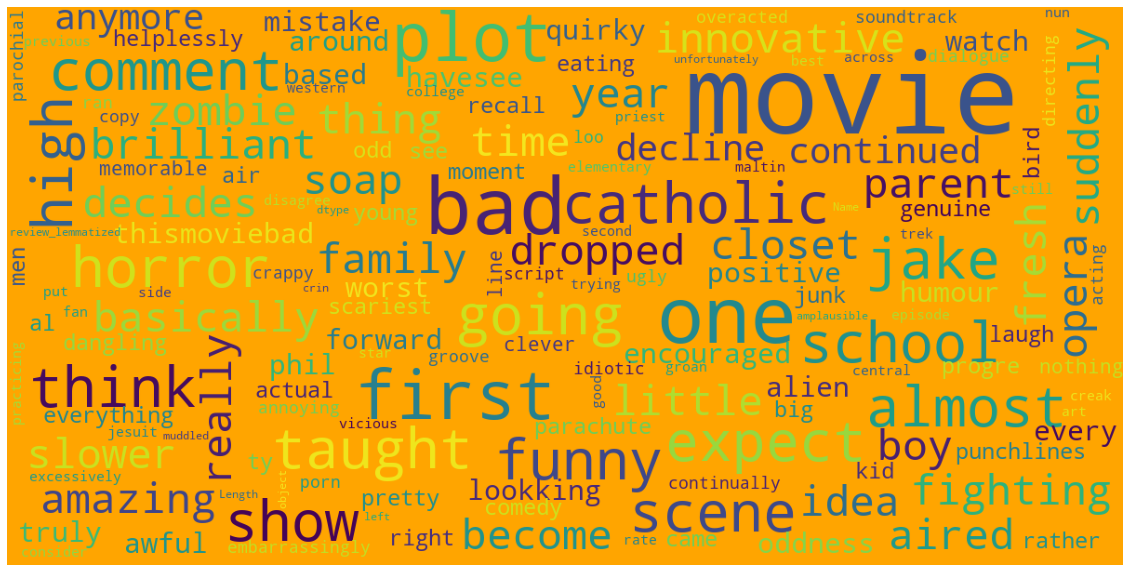

In [43]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title="Negative Sentiment Reviews", fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[df["sentiment"]==0]["review_lemmatized"])

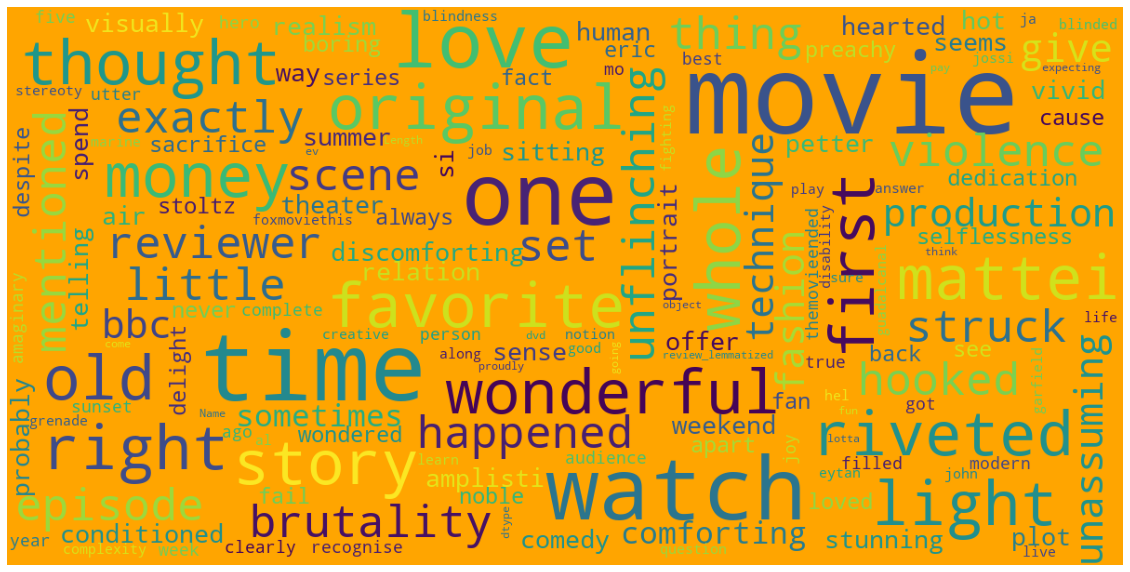

In [44]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[df["sentiment"]==1]["review_lemmatized"])

#### We should untokenize the "review_lemmatized" column to find how much there are the most common words

In [45]:
df['review_detoken']=df['review_lemmatized'].str.join(" ")

df.head(3)

,review,sentiment,review_tokenized,review_nostop,review_lemmatized,review_detoken
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r...",one reviewer mentioned watch episode hooked right exactly happened first thing struck brutality unflinching scene violence set right word go trust...
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,...",wonderful little production movie technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece act...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...",thought wonderful way spend time hot summer weekend sitting air conditioned theater watch light hearted comedy plot si amplistic dialogue witty ch...


In [46]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df["review_detoken"])
corpus[:10]

['one',
 'reviewer',
 'mentioned',
 'watch',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first']

In [47]:
from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(25)
most_common = dict(most_common)
most_common

{'also': 17464,
 'bad': 17205,
 'character': 27914,
 'could': 18025,
 'even': 24263,
 'get': 24374,
 'go': 18642,
 'good': 47567,
 'great': 17162,
 'hi': 21945,
 'like': 38086,
 'make': 23223,
 'movie': 91660,
 'much': 19040,
 'one': 53436,
 'people': 18151,
 'really': 22756,
 'scene': 21038,
 'see': 41511,
 'show': 16872,
 'story': 24649,
 'time': 30358,
 'watch': 27169,
 'way': 16894,
 'would': 25762}

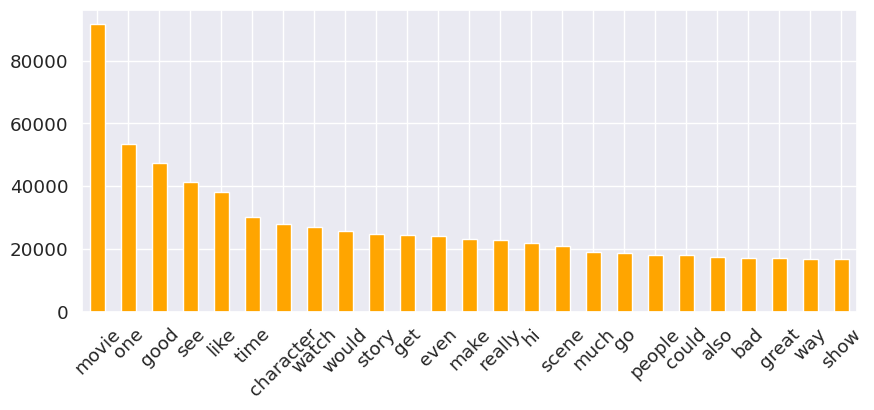

In [48]:
most_common=pd.Series(data=most_common)

plt.figure(figsize=(10,4), dpi=100)
most_common.plot(kind='bar', color="orange")
plt.xticks(rotation=45);

## Vectorizing

#### Bag of Words

In [33]:
df_copy=df.copy()


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [50]:
X=df["review_detoken"]
Y=df["sentiment"]

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [59]:
# It is used to convert text documents to numerical vectors or bag of words

cv = CountVectorizer(ngram_range=(1,2))

In [60]:
X_train_trans = cv.fit_transform(X_train)

### Logistic Regression for NLP with CountVectorizer

In [61]:
log_reg=LogisticRegression()

log_reg.fit(X_train_trans, Y_train)

y_test_pred_log= log_reg.predict(cv.transform(X_test))

print("Accuracy score :", accuracy_score(Y_test, y_test_pred_log))

Accuracy score : 0.899


In [62]:
print("Classification report:","\n", classification_report(Y_test, y_test_pred_log),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test, y_test_pred_log))

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 

Confusion matrix: 
 [[4420  541]
 [ 469 4570]]


### Logistic Regression for NLP with TfidfVectorizer

In [63]:
tfidf=TfidfVectorizer(ngram_range=(1,3))

X_train_tfidf = tfidf.fit_transform(X_train)

# X_train--> fit_transform() edilirken; X_test--> sadece transform() edilir

In [64]:
log_reg_tfidf=LogisticRegression()

log_reg_tfidf.fit(X_train_tfidf, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_test_pred_tfidf = log_reg_tfidf.predict(tfidf.transform(X_test))

In [66]:
print("Accuracy score :", accuracy_score(Y_test, y_test_pred_log))
print("Classification report:","\n", classification_report(Y_test, y_test_pred_log),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test, y_test_pred_log))


Accuracy score : 0.899
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 

Confusion matrix: 
 [[4420  541]
 [ 469 4570]]


#### Either countvectorizer or tfidfvectorizer have same accuracy 

# Let's continue to apply Deep Learning

In [67]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
model=Sequential()

In [69]:
input=X_train_tfidf.shape[1]

X_train_tfidf.shape

(40000, 7031197)

In [70]:
model.add(Dense(32, activation="relu", input_shape=(input,), name="Layer_1"))

In [71]:
model.add(Dense(20, activation="relu", name="Layer_2"))
model.add(Dense(16, activation="relu", name="Layer_3"))
model.add(Dense(16, activation="relu", name="Layer_4"))
model.add(Dense(8, activation="relu", name="Layer_5"))

In [72]:
model.add(Dense(1,activation="sigmoid", name="output_layer"))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 32)                224998336 
_________________________________________________________________
Layer_2 (Dense)              (None, 20)                660       
_________________________________________________________________
Layer_3 (Dense)              (None, 16)                336       
_________________________________________________________________
Layer_4 (Dense)              (None, 16)                272       
_________________________________________________________________
Layer_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 224,999,749
Trainable params: 224,999,749
Non-trainable params: 0
__________________________________________

In [75]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 32)                224998336 
_________________________________________________________________
Layer_2 (Dense)              (None, 20)                660       
_________________________________________________________________
Layer_3 (Dense)              (None, 16)                336       
_________________________________________________________________
Layer_4 (Dense)              (None, 16)                272       
_________________________________________________________________
Layer_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 224,999,749
Trainable params: 224,999,749
Non-trainable params: 0
__________________________________________

In [77]:
model.fit(X_train_tfidf, Y_train, 
          epochs=100,
          batch_size = 10, 
          validation_data=(tfidf.transform(X_test), Y_test))

Epoch 1/100


InvalidArgumentError: ignored

In [78]:
len(X_train_tfidf.data)

12987646

In [ ]:
# It is used to convert text documents to numerical vectors or bag of words

cv=CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

# transformed train review
cv_train_reviews=cv.fit_transform(X_train)

# transformed test review
cv_test_reviews=cv.transform(X_test)

print("Bag of words train:", cv_train_reviews.shape)
print("Bag of words test:", cv_test_reviews.shape)

### TfidfVectorizer

In [ ]:
# TfidfVectorizer

tv=TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

# transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)

# transformed test reviews
tv_test_reviews=tv.transform(X_test)

print("Tfidf_train:", tv_train_reviews.shape)
print("Tfidf_test:", tv_test_reviews.shape)

## Logistic Regression

In [ ]:
log = LogisticRegression(penalty="l2", random_state=42)

log.fit(cv_train_reviews,Y_train)
pred_log_bow=log.predict(cv_test_reviews)

print("Accuracy of logistic regression for bag of words:", accuracy_score(Y_test,pred_log_bow),"\n")
print("Classification report:","\n", classification_report(Y_test,pred_log_bow))

In [ ]:
# Most common and rare words:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

def get_n_words(corpus, direction, n):
    vec=CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction=="top":
        words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
    else:
        words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words=get_n_words(df["review_clean"], "top", 15)
rare_words=get_n_words(df["review_clean"], "bottom", 15)

In [ ]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()